# Lab Demo COMP7035 Week 10

## Lab Demo COMP7035 Week 10
### Be familiar with Keras for creating deep learning models

## Exercise 1

## Problem 1: Defining a CNN model with Keras (1)
#### Using Sequential API to define a CNN model. The CNN model follows the architecture below and outputs the model summary. 
![avatar](cnn1.png)

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Reshape
import numpy as np

n_filter1 = 32
n_filter2 = 1
filter_size1 = 5
filter_size2 = 1

# Write your codes to define the CNN model
reshape_layer=Reshape((64,64,16))
cnn_layer1=Conv2D(n_filter1,filter_size1,input_shape=(64,64,1))
cnn_layer2 = Conv2D(n_filter2,filter_size2,input_shape=(30,30,1))
pooling_layer = MaxPool2D(2) 
flatten_layer = Flatten()
dense_layer = Dense(16, activation='sigmoid')

model =Sequential()
model.add(reshape_layer)
model.add(cnn_layer1)
model.add(pooling_layer)
model.add(flatten_layer)
model.add(dense_layer)
# Test the CNN model
x = keras.backend.constant(np.random.randn(1, 256, 256))
y = model(x)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_4 (Reshape)         (1, 64, 64, 16)           0         
                                                                 
 conv2d_6 (Conv2D)           (1, 60, 60, 32)           12832     
                                                                 
 max_pooling2d_3 (MaxPoolin  (1, 30, 30, 32)           0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (1, 28800)                0         
                                                                 
 dense_2 (Dense)             (1, 16)                   460816    
                                                                 
Total params: 473648 (1.81 MB)
Trainable params: 473648 (1.81 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

## Problem 2: Defining a CNN model with Keras (2)
#### Using the Functional API to define another CNN model. The CNN model follows the architecture below and outputs the model summary.
![avatar](cnn2.png)

In [9]:
import keras
from keras.models import Model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Reshape,concatenate
import numpy as np

n_filter1 = 8
n_filter2 = 8
filter_size1 = 5
filter_size2 = 17

x = keras.backend.constant(np.random.randn(1, 256, 256))

# Write your codes to define your CNN model
x11=Reshape((64,64,16))(x)
x21=Reshape((256,256,1))(x)
x12=Conv2D(n_filter1,filter_size1,input_shape=(64,64,1))(x11)
x22=Conv2D(n_filter2,filter_size2,input_shape=(256,256,1))(x21)
x23=MaxPool2D(4)(x22)

x3=concatenate([x12,x23])
print(x3.shape)

(1, 60, 60, 16)


## Problem 3: Loss Functions (Mean Squared Error vs. Mean Absolute Error)
#### Given y_true and y_pred, calculating the MSE and MAE values  
#### Task 3.1 Measure the MSE value 
#### Task 3.2 Measure the MAE value

In [12]:
import keras
from keras.losses import MeanAbsoluteError, MeanSquaredError
mse = MeanSquaredError()
mae = MeanAbsoluteError()

y_true = [[0., 0.3], [0., 1.]]
y_pred = [[1., 1.], [1., 0.]]

# Mean Squared Error (MSE) 
# Task 3.1 Write your codes to measure the MSE value
z_mse=mse(y_true,y_pred)

print("The MSE value is {}".format(z_mse.numpy()))


# Mean Absolute Error (MAE)
# Task 3.2 Write your codes to measure the MAE value
z_mae=mae(y_true,y_pred)

print("The MAE value is {}".format(z_mae.numpy()))

The MSE value is 0.8725000023841858
The MAE value is 0.925000011920929


## Problem 4: Loss Functions (Categorical Cross-Entropy)
#### Given y_true and y_pred, calculating the Categorical Cross-Entropy value

In [13]:
import keras
from keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy, BinaryCrossentropy

y_true = [[0, 1, 0], [0, 0, 1]]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]

# Categorical Cross-entropy
# Write your codes to measure the categorical cross-entropy
loss = CategoricalCrossentropy()
z = loss(y_true,y_pred)
print("The Categorical Cross-Entropy value is {}".format(z.numpy()))

The Categorical Cross-Entropy value is 1.1769392490386963


## Problem 5: Loss Functions (Sparse Cross-Entropy)
#### Given y_true and y_pred, calculating the Sparse Cross-Entropy value

In [14]:
import keras
from keras.losses import SparseCategoricalCrossentropy

y_true = [1, 2]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]

# Sparse Cross-entropy
## Write your codes to measure the Sparse Categorical-entropy
loss = SparseCategoricalCrossentropy()
z=loss(y_true,y_pred)

print("The Sparse Cross-Entropy value is {}".format(z.numpy()))

The Sparse Cross-Entropy value is 1.1769392490386963


## Problem 6: Loss Functions (Binary Cross-Entropy)
#### Given y_true and y_pred, calculating the Binary Cross-Entropy value

In [15]:
import keras
from keras.losses import BinaryCrossentropy

y_true = [0, 1, 0, 0]
y_pred = [-18.6, 0.51, 2.94, -12.8]

# Binary Cross-entropy
# Write your codes to measure the Binary Cross-entropy
loss = BinaryCrossentropy() 
z = loss(y_true, y_pred) 
print("The Binary Cross-Entropy value is {}".format(z.numpy()))

The Binary Cross-Entropy value is 4.001645565032959


## Problem 7: Optimizer and Evaluation
#### Task 7.1 set up the deep learning model based on the given DNN structure.
###### Input(28x28x1) -> Conv2D(32, kernel_size=3) -> MaxPooling2D(2) -> Conv2D(64, kernel_size=3) -> MaxPooling2D(2) -> Dropout(0.5) -> Dense(10, 'softmax')
##### Task 7.1 using Adam optimizer and fitting the CNN model 
##### Task 7.2 evaluating the performance on test data

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, MaxPooling2D
import numpy as np

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

batch_size = 128
epochs = 15

# Write your codes to set up Adam optimizer and fit the CNN model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
# Evaluate the performance on the test data
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

11490434/11490434 [==============================] - 2s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)         

## Exercise 2

#### Defining your customized CNN or DNN model for pattern classification on the Fashion MNIST dataset.

In [10]:
# baseline cnn model for fashion mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

##### Loading the Fashion MNIST dataset

In [11]:
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    
    return trainX, trainY, testX, testY

In [12]:
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images

    return train_norm, test_norm

##### Defining your customised CNN or DNN model as shown in classes using Keras

In [13]:
# define CNN model
def define_model():
    model = Sequential()
    # Write your codes to define your model
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [14]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # append scores
    scores.append(acc)
    histories.append(history)
    
    return scores, histories

In [15]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(211)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        pyplot.subplot(212)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
        pyplot.show()

In [16]:
# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()

In [17]:
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # evaluate model
    scores, histories = evaluate_model(trainX, trainY)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)

> 91.267


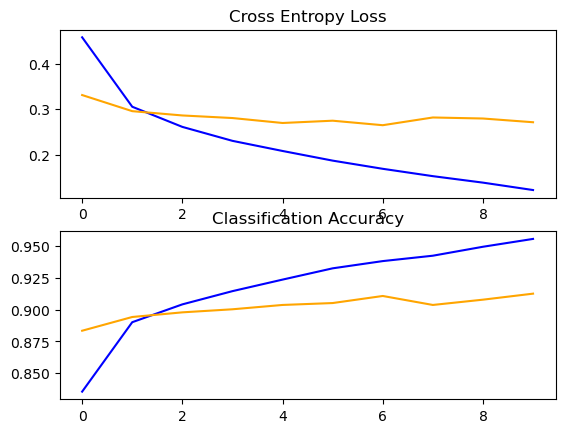

Accuracy: mean=91.267 std=0.000, n=1


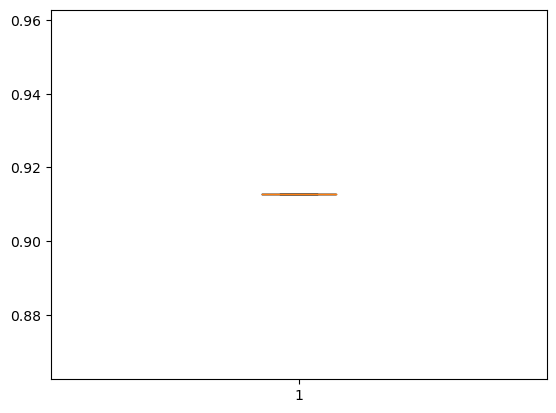

In [18]:
# entry point, run the test harness
run_test_harness()